In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv(r"C:\Users\harsh\datasets\petrol_consumption.csv")

In [5]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [6]:
df.shape

(48, 5)

In [7]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [8]:
df.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

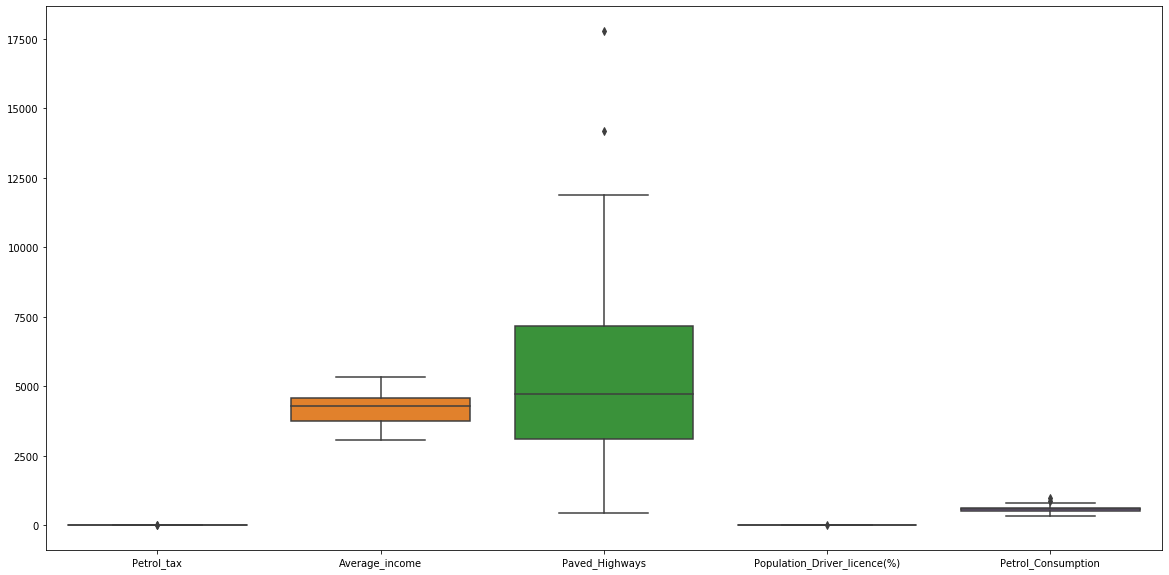

In [9]:
ax=plt.subplots(figsize=(20,10))
d=sns.boxplot(data=df)

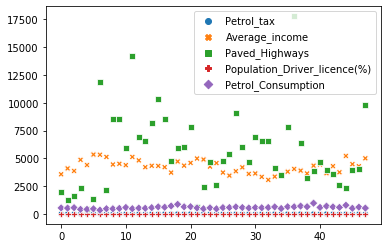

In [10]:
sns.scatterplot(data=df)

In [11]:
from scipy import stats
import numpy as np

In [12]:
z=np.abs(stats.zscore(df))

In [13]:
print(np.where(z>3))

(array([36, 39], dtype=int64), array([2, 4], dtype=int64))


In [14]:
df.shape

(48, 5)

In [15]:
df1=df[(z<3).all(axis=1)]

In [16]:
df1.shape

(46, 5)

In [17]:
from sklearn.model_selection import train_test_split
x=df.drop('Petrol_Consumption',axis=1)
x.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,9.0,3571,1976,0.525
1,9.0,4092,1250,0.572
2,9.0,3865,1586,0.580
3,7.5,4870,2351,0.529
4,8.0,4399,431,0.544


In [18]:
y=df['Petrol_Consumption']
y.head()

0    541
1    524
2    561
3    414
4    410
Name: Petrol_Consumption, dtype: int64

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [68]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=200,random_state=0)
reg.fit(X_train,Y_train)
p=reg.predict(X_test)

In [69]:
print(p)

[569.205 492.36  600.975 592.405 607.09  609.635 591.02  570.74  469.71
 509.145]


In [70]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

In [71]:
print(mean_absolute_error(p,Y_test))

48.124500000000005


In [72]:
print(math.sqrt(mean_squared_error(p,Y_test)))

59.142219035981405


In [73]:
reg.score(X_test,Y_test)

0.4030484018097291

In [76]:
from sklearn.metrics import r2_score
r2_score(Y_test,p)

0.4030484018097291